In [ ]:
#initialize environment, load modules/libraries

import os
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

#import python code from seperate files
from helpers.fourier_transform import load_wav, dft_logmag, patches, dft

# load for test purposes
from scipy.io import wavfile

In [ ]:
music_dir = './data/music_wav'

# music data file names used for testing
music_test = [
    'unpoco.wav',
    'blues.wav',
    'gismonti.wav',
    'ipanema.wav',
    'deedee.wav',
    'hendrix.wav',
    'madradeus.wav',
    'marlene.wav',
    'beatles.wav',
    'bagpipe.wav',
    'redhot.wav',
    'jazz.wav'
]

music_test = [os.path.join(music_dir, file) for file in music_test]

music = [os.path.join(music_dir, file) for file in os.listdir(music_dir) if file.endswith('.wav')]

# create set of audio files without test files
music = list(set(music)-set(music_test))

speech_dir = './data/speech_wav'

# speech data file names used for testing
speech_test = [
    'comedy.wav',
    'thlui.wav',
    'voices.wav',
    'conversion.wav',
    'china.wav',
    'vegetables2.wav',
    'amal.wav',
    'teachers2.wav',
    'chant.wav',
    'pulp2.wav',
    'acomic.wav',
    'kid.wav'
]
speech_test = [os.path.join(speech_dir, file) for file in speech_test]

speech = [os.path.join(speech_dir, file) for file in os.listdir(speech_dir) if file.endswith('.wav')]

# create set of audio files without test files
speech = list(set(speech)-set(speech_test))
	  
print(len(music), len(speech))

In [ ]:
test = speech_test + music_test
test_labels = np.zeros(len(test))
test_labels[0:len(speech_test)]=1

train = speech + music
train_labels = np.zeros(len(train))
train_labels[0:len(speech)]=1

In [ ]:
train_sounds = load_wav(train)
train_sounds.shape

In [ ]:
plt.plot(train_sounds[0])
plt.show()

In [ ]:
fft_step=256
fft_size=512
fft_chunks = len(train_sounds[0])//fft_step

train_logmag = dft_logmag(train_sounds,fft_chunks,fft_step,fft_size)
print(train_logmag.shape)

In [ ]:
train_logmag[0].flatten().min()

In [ ]:
plt.imshow(train_logmag[0].T)
plt.xlabel('t')
plt.ylabel('frequency')
plt.colorbar()
plt.show()

In [77]:
patch_step = 32
patch_size = 64

def ds_window(sound, label, patch_step, patch_size):
    labels = np.ones(len(sound))*label
    sound = np.c_[sound,labels]
    ds = tf.data.Dataset.from_tensor_slices(sound)
    ds = ds.window(size=patch_size,shift=patch_step,drop_remainder=True)
    ds = ds.flat_map(lambda x: x.batch(patch_size))
    return ds

def ds_patches(sounds, labels, patch_step, patch_size):
    ds = ds_window(sounds[0],labels[0],patch_step,patch_size)
    for sound, label in zip(sounds[1:],labels[1:]): ds.concatenate(ds_window(sound,label,patch_step,patch_size))
    ds = ds.map(lambda x: (x[:,:-1], x[0,-1]))
    return ds

train_ds = ds_patches(train_logmag, train_labels, patch_step, patch_size)

In [ ]:
n = 10
for sound, label in train_ds.take(n):
    sound = sound.numpy()
    print(f"{sound.shape} : {sound[[0,patch_step],0]} : {sound[[-patch_step-1,-1],0]}")

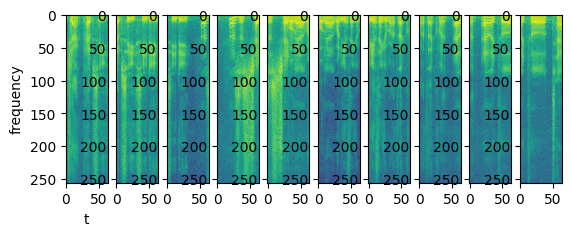

In [59]:
for i, (sound, label) in enumerate(train_ds.take(n)):
    plt.subplot(1,n,i+1)
    plt.imshow(sound.numpy().T)
    if i == 0:
        plt.xlabel('t')
        plt.ylabel('frequency')
plt.show()

In [ ]:
train_logmag_patches = patches(train_logmag,patch_step,patch_size)
print(train_logmag_patches.shape)



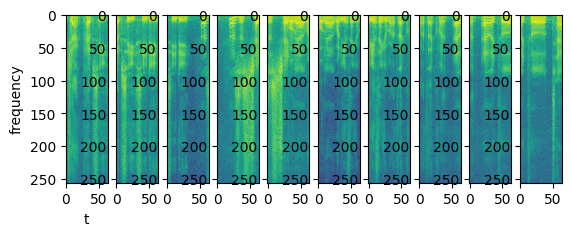

In [41]:
for i in range(n):
    plt.subplot(1,n,i+1)
    plt.imshow(train_logmag_patches[0,i].T)
    if i == 0:
        plt.xlabel('t')
        plt.ylabel('frequency')
plt.show()

In [83]:
x_train=train_ds.map(lambda x_train, labels: x_train)


#images = dataset.map(lambda images, labels: images)
#labels = dataset.map(lambda images, labels: labels)

In [84]:
for images, labels in train_ds.take(-1):  # only take first element of dataset
    numpy_images = images.numpy()
    numpy_labels = labels.numpy()

In [90]:
for x_train, y_train in train_ds.batch(6):
    print(x_train)  # array of shape (32,28,28) in tf.Tensor
    print(y_train)  # array of shape (32,) in tf.Tensor

tf.Tensor(
[[[ -5.78020992  -4.77598514  -3.08248271 ... -10.84482405 -10.84391298
   -10.95135499]
  [ -5.5634748   -4.98728795  -3.49918665 ... -10.6655232  -10.76770552
   -11.44127838]
  [ -5.48773201  -6.22982239  -4.28848593 ... -10.1143089   -9.5619928
    -9.34182378]
  ...
  [ -6.04271503  -5.38921553  -6.26827888 ...  -9.68849977  -9.78883769
    -9.70761018]
  [ -7.42736797  -6.1796253   -7.45186435 ...  -9.0866129   -9.03595398
    -9.6412312 ]
  [ -4.90851528  -5.32464452  -6.34787914 ...  -9.07919018  -8.64847466
    -8.35798786]]

 [[ -5.33626438  -4.18403255  -3.1626201  ...  -9.82430602 -10.22320359
   -10.8309711 ]
  [ -5.8818379   -4.4644263   -3.43766597 ...  -9.47106892  -9.57316433
    -9.585564  ]
  [ -5.71308284  -4.39404862  -3.44794422 ... -10.8471852  -11.97632178
   -11.60904119]
  ...
  [ -6.17749402  -4.49431152  -3.56786015 ... -11.24400127 -11.65622526
   -12.05285568]
  [ -6.20290993  -5.21454502  -3.76938823 ... -11.13513432 -10.8125013
   -10.75775047